In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Asteroid_Updated.csv")

C:\Users\NITRO\AppData\Local\Temp\ipykernel_13204\2455990271.py:1: DtypeWarning: Columns (0,10,15,16,23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("Asteroid_Updated.csv")


In [3]:
df.head()

,name,a,e,i,om,w,q,ad,per_y,data_arc,...,UB,IR,spec_B,spec_T,G,moid,class,n,per,ma
0,Ceres,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,...,0.426,NaN,C,G,0.12,1.59478,MBA,0.213885,1683.145708,77.372096
1,Pallas,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,...,0.284,NaN,B,B,0.11,1.23324,MBA,0.213503,1686.155999,59.699133
2,Juno,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,...,0.433,NaN,Sk,S,0.32,1.03454,MBA,0.226019,1592.787285,34.925016
3,Vesta,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,...,0.492,NaN,V,V,0.32,1.13948,MBA,0.271609,1325.432765,95.861936
4,Astraea,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,...,0.411,NaN,S,S,NaN,1.09589,MBA,0.238632,1508.600458,282.366289


In [4]:
df.isna().sum()

name              817747
a                      2
e                      0
i                      0
om                     0
w                      0
q                      0
ad                     6
per_y                  1
data_arc           15474
condition_code       867
n_obs_used             0
H                   2689
neo                    6
pha                16442
diameter          702078
extent            839696
albedo            703305
rot_per           820918
GM                839700
BV                838693
UB                838735
IR                839713
spec_B            838048
spec_T            838734
G                 839595
moid               16442
class                  0
n                      2
per                    6
ma                     8
dtype: int64

## Since we have to predict Diameter,
### For model formation :- droping the values with unknown diameter
### For Prediction :- the values with unknown diameter
#### On observing data diameter and albedo both are missing hence we have to drop albedo also.



In [5]:
df=df.dropna(subset=["diameter"])

In [6]:
df=df.dropna(subset=["albedo"])

In [7]:
df.isna().sum()

name              121302
a                      0
e                      0
i                      0
om                     0
w                      0
q                      0
ad                     0
per_y                  0
data_arc             129
condition_code         0
n_obs_used             0
H                    273
neo                    0
pha                    0
diameter               0
extent            136394
albedo                 0
rot_per           125252
GM                136394
BV                135408
UB                135448
IR                136405
spec_B            135048
spec_T            135448
G                 136289
moid                   0
class                  0
n                      0
per                    0
ma                     0
dtype: int64

In [8]:
len(df)

136406

In [9]:
df.columns

Index(['name', 'a', 'e', 'i', 'om', 'w', 'q', 'ad', 'per_y', 'data_arc',
       'condition_code', 'n_obs_used', 'H', 'neo', 'pha', 'diameter', 'extent',
       'albedo', 'rot_per', 'GM', 'BV', 'UB', 'IR', 'spec_B', 'spec_T', 'G',
       'moid', 'class', 'n', 'per', 'ma'],
      dtype='object')

#### Since columns-'extent',  'rot_per', 'GM', 'BV', 'UB', 'IR', 'spec_B', 'spec_T', 'G' has more than 100k missing values hence droping them

In [10]:
df=df.drop(['extent','rot_per', 'GM', 'BV', 'UB', 'IR', 'spec_B', 'spec_T', 'G'],axis=1)

In [11]:
df.isna().sum()

name              121302
a                      0
e                      0
i                      0
om                     0
w                      0
q                      0
ad                     0
per_y                  0
data_arc             129
condition_code         0
n_obs_used             0
H                    273
neo                    0
pha                    0
diameter               0
albedo                 0
moid                   0
class                  0
n                      0
per                    0
ma                     0
dtype: int64

In [12]:
len(df)

136406

### 130k is large hence droping values with NAN in "data_arc","H"

In [13]:
df=df.dropna(subset=["data_arc","H"])

In [14]:
df.head()

,name,a,e,i,om,w,q,ad,per_y,data_arc,...,H,neo,pha,diameter,albedo,moid,class,n,per,ma
0,Ceres,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,...,3.34,N,N,939.4,0.0900,1.59478,MBA,0.213885,1683.145708,77.372096
1,Pallas,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,...,4.13,N,N,545,0.1010,1.23324,MBA,0.213503,1686.155999,59.699133
2,Juno,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,...,5.33,N,N,246.596,0.2140,1.03454,MBA,0.226019,1592.787285,34.925016
3,Vesta,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,...,3.20,N,N,525.4,0.4228,1.13948,MBA,0.271609,1325.432765,95.861936
4,Astraea,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,...,6.85,N,N,106.699,0.2740,1.09589,MBA,0.238632,1508.600458,282.366289


In [15]:
df.describe()

,a,e,i,om,w,q,ad,per_y,data_arc,n_obs_used,H,albedo,moid,n,per,ma
count,136005.000000,136005.000000,136005.000000,136005.000000,136005.000000,136005.000000,136005.000000,136005.000000,136005.000000,136005.000000,136005.000000,136005.000000,136005.000000,136005.000000,1.360050e+05,136005.000000
mean,2.815693,0.145313,10.282281,169.807486,181.836278,2.403970,3.227416,4.888298,9038.231322,682.142436,15.168089,0.130239,1.421260,0.219453,1.785451e+03,183.059375
std,1.530973,0.077182,6.787443,102.719643,103.549080,0.516701,2.912808,25.684872,6152.748606,595.352159,1.404894,0.110096,0.512976,0.056268,9.381399e+03,103.311876
min,0.626226,0.000489,0.021855,0.000738,0.004466,0.081882,0.999956,0.495569,1.000000,5.000000,3.200000,0.001000,0.000166,0.000128,1.810067e+02,0.000517
25%,2.537771,0.089642,5.086016,82.280385,91.854209,2.069771,2.865559,4.042843,6317.000000,222.000000,14.400000,0.053000,1.083150,0.181237,1.476648e+03,94.382492
50%,2.751052,0.138445,9.333112,160.495337,183.544850,2.364667,3.167517,4.563063,7593.000000,505.000000,15.300000,0.079000,1.385500,0.216001,1.666659e+03,186.758091
75%,3.092468,0.190912,13.660185,256.133089,271.650499,2.686388,3.467761,5.438335,9774.000000,992.000000,16.100000,0.189000,1.699980,0.243795,1.986352e+03,271.324734
max,389.145964,0.984348,170.323647,359.990858,359.995174,40.465671,772.201080,7676.742943,72684.000000,9325.000000,27.500000,1.000000,39.507000,1.988877,2.803930e+06,359.999979


In [16]:
df.dtypes

name               object
a                 float64
e                 float64
i                 float64
om                float64
w                 float64
q                 float64
ad                float64
per_y             float64
data_arc          float64
condition_code     object
n_obs_used          int64
H                 float64
neo                object
pha                object
diameter           object
albedo            float64
moid              float64
class              object
n                 float64
per               float64
ma                float64
dtype: object

### Droping "name"

In [17]:
df=df.drop("name",axis=1)

In [18]:
df.nunique()

a                 136005
e                 136005
i                 136005
om                136005
w                 136005
q                 136005
ad                136005
per_y             136005
data_arc           18546
condition_code        20
n_obs_used          3129
H                    715
neo                    2
pha                    2
diameter           24443
albedo              1057
moid               94012
class                 11
n                 136005
per               136005
ma                136005
dtype: int64

In [19]:
df.pha.unique()

array(['N', 'Y'], dtype=object)

In [20]:
df["pha"]=df["pha"].replace({"N":0,"Y":1})

In [21]:
df.neo.unique()

array(['N', 'Y'], dtype=object)

In [22]:
df["neo"]=df["neo"].replace({"N":0,"Y":1})

In [23]:
df["class"].unique()

array(['MBA', 'OMB', 'MCA', 'AMO', 'IMB', 'TJN', 'CEN', 'APO', 'ATE',
       'AST', 'TNO'], dtype=object)

In [24]:
df["condition_code"].unique()

array([0, 1, 3, 2, '0', '1', '2', '4', '5', '9', '3', '7', 5.0, 6.0, 4.0,
       7.0, 9.0, 8.0, '8', '6'], dtype=object)

In [25]:
df["condition_code"]=df["condition_code"].astype(int)

In [26]:
df.dtypes

a                 float64
e                 float64
i                 float64
om                float64
w                 float64
q                 float64
ad                float64
per_y             float64
data_arc          float64
condition_code      int32
n_obs_used          int64
H                 float64
neo                 int64
pha                 int64
diameter           object
albedo            float64
moid              float64
class              object
n                 float64
per               float64
ma                float64
dtype: object

#### Here diameter is in Object type , changing it to float64

In [27]:
df["diameter"]=df["diameter"].astype(float)

In [28]:
df['class'].value_counts()

MBA    124971
OMB      7394
TJN      1873
IMB       564
APO       454
MCA       336
AMO       255
ATE        91
CEN        48
TNO        13
AST         6
Name: class, dtype: int64

#### here for class, mapping it with numerical value inversely to its density i.e lessor for MBA 

In [29]:
df["class"]=df["class"].replace({'MBA':1, 'OMB':65, 'MCA':10, 'AMO':75, 'IMB':70, 'TJN':20, 'CEN':80, 'APO':85, 'ATE':90,
       'AST':95, 'TNO':100})

In [30]:
df.dtypes

a                 float64
e                 float64
i                 float64
om                float64
w                 float64
q                 float64
ad                float64
per_y             float64
data_arc          float64
condition_code      int32
n_obs_used          int64
H                 float64
neo                 int64
pha                 int64
diameter          float64
albedo            float64
moid              float64
class               int64
n                 float64
per               float64
ma                float64
dtype: object

<AxesSubplot:>

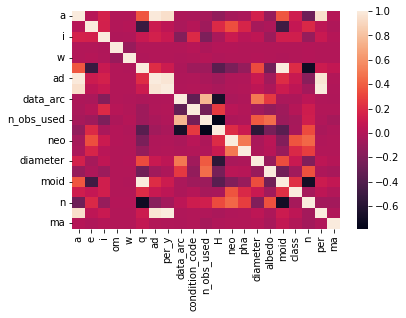

In [31]:
sns.heatmap(df.corr())

#### Box plots for q,data_arc,n_obs_used,H,moid,n

C:\Users\NITRO\Documents\project_1\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


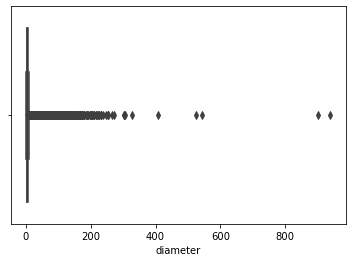

In [32]:
sns.boxplot(df["diameter"]);

C:\Users\NITRO\Documents\project_1\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


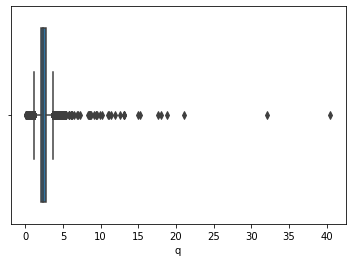

In [33]:
sns.boxplot(df["q"]);

C:\Users\NITRO\Documents\project_1\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


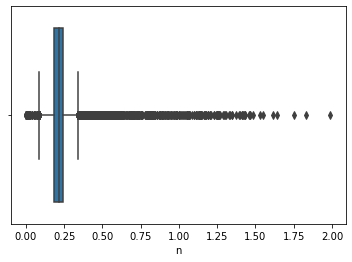

In [34]:
sns.boxplot(df["n"]);

C:\Users\NITRO\Documents\project_1\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


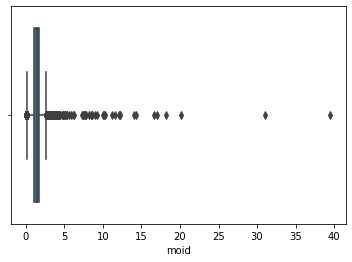

In [35]:
sns.boxplot(df["moid"]);

C:\Users\NITRO\Documents\project_1\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


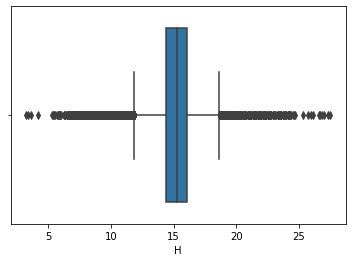

In [36]:
sns.boxplot(df["H"]);

C:\Users\NITRO\Documents\project_1\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


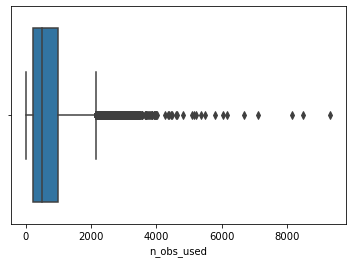

In [37]:
sns.boxplot(df["n_obs_used"]);

C:\Users\NITRO\Documents\project_1\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


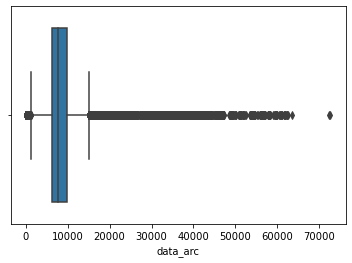

In [38]:
sns.boxplot(df["data_arc"]);

#### Removing outliers

In [39]:
u_l=df["moid"].quantile(0.98)
l_l=df["moid"].quantile(0.001)

In [40]:
u_l,l_l

(2.228143599999999, 0.022738374399999997)

In [41]:
df["moid"]=np.where(df["moid"]>u_l,u_l,df["moid"])
df["moid"]=np.where(df["moid"]<l_l,l_l,df["moid"])

In [42]:
u_l=df["diameter"].quantile(0.98)
l_l=df["diameter"].quantile(0.001)

In [43]:
u_l,l_l

(19.831679999999935, 0.251004)

In [44]:
df["diameter"]=np.where(df["diameter"]>u_l,u_l,df["diameter"])
df["diameter"]=np.where(df["diameter"]<l_l,l_l,df["diameter"])

In [45]:
u_l=df["q"].quantile(0.99)
l_l=df["q"].quantile(0.001)

In [46]:
u_l,l_l

(4.725828926713085, 0.5634329087003002)

In [47]:
df["q"]=np.where(df["q"]>u_l,u_l,df["q"])
df["q"]=np.where(df["q"]<l_l,l_l,df["q"])

In [48]:
df.corr()["diameter"].sort_values()

H                -0.795367
n                -0.415110
albedo           -0.222304
condition_code   -0.155115
e                -0.118750
neo              -0.082307
pha              -0.044200
om                0.000551
w                 0.002207
ma                0.023978
per_y             0.047626
per               0.047626
i                 0.099684
ad                0.111940
class             0.168614
a                 0.187234
moid              0.433449
q                 0.495942
n_obs_used        0.535958
data_arc          0.545872
diameter          1.000000
Name: diameter, dtype: float64

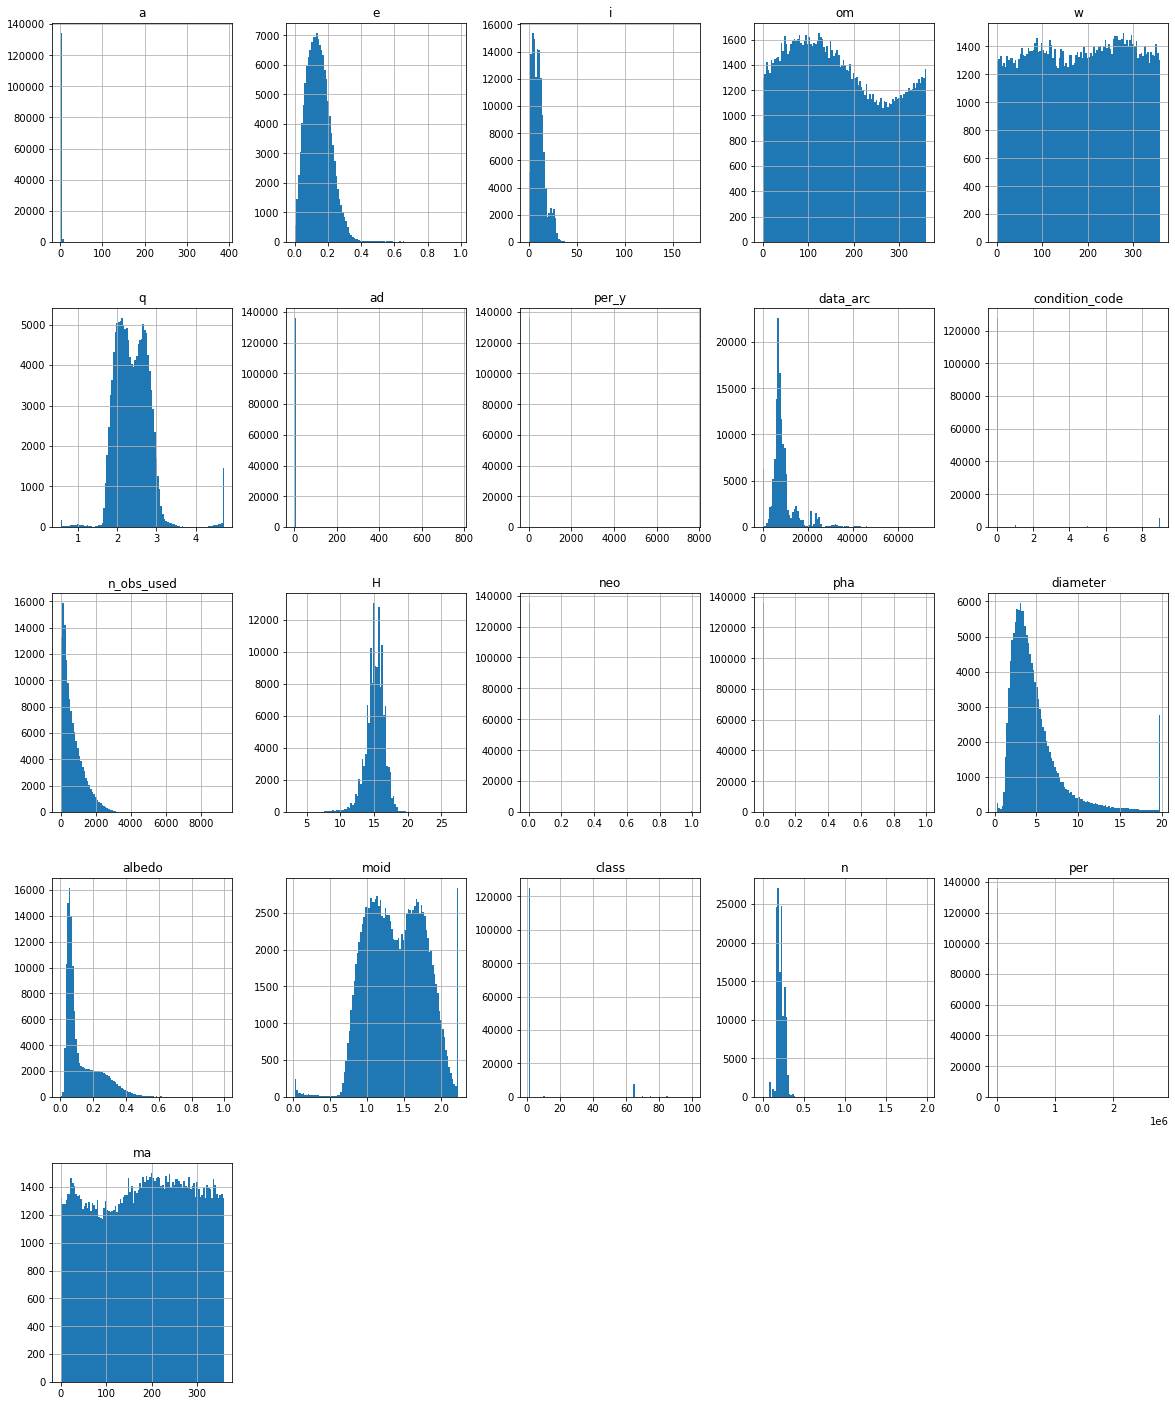

In [49]:
df.hist(bins=100,figsize=(20,25));

In [50]:
df.corr()["diameter"].sort_values()

H                -0.795367
n                -0.415110
albedo           -0.222304
condition_code   -0.155115
e                -0.118750
neo              -0.082307
pha              -0.044200
om                0.000551
w                 0.002207
ma                0.023978
per_y             0.047626
per               0.047626
i                 0.099684
ad                0.111940
class             0.168614
a                 0.187234
moid              0.433449
q                 0.495942
n_obs_used        0.535958
data_arc          0.545872
diameter          1.000000
Name: diameter, dtype: float64

In [51]:
X=df.drop("diameter",axis=1)
y=df["diameter"]

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [54]:
X_train.head()

,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,neo,pha,albedo,moid,class,n,per,ma
215051,3.167484,0.261282,24.397326,345.480044,118.634909,2.339878,3.995090,5.637412,9731.0,0,123,15.4,0,0,0.024,1.44736,1,0.174837,2059.064883,325.098510
479605,2.708513,0.147731,11.771985,298.635170,312.075884,2.308383,3.108643,4.457637,3795.0,0,91,17.0,0,0,0.065,1.31125,1,0.221110,1628.151793,337.123806
739291,3.142587,0.240795,9.986225,294.129842,218.647272,2.385867,3.899307,5.571077,2724.0,1,54,16.7,0,0,0.143,1.40691,1,0.176918,2034.835909,270.077129
529695,3.162270,0.078528,10.287425,58.294448,129.759569,2.913942,3.410599,5.623500,5762.0,0,95,16.2,0,0,0.058,1.92597,1,0.175269,2053.983321,323.745993
88576,2.748065,0.167651,13.435184,19.664031,50.853613,2.287349,3.208782,4.555633,7527.0,0,1175,14.3,0,0,0.283,1.32478,1,0.216353,1663.944940,244.027774


In [55]:
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score

In [56]:
from time import time

from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [57]:
regressors = [
    KNeighborsRegressor(),
    GradientBoostingRegressor(),
    ExtraTreesRegressor(),
    RandomForestRegressor(),
    DecisionTreeRegressor(),
    LinearRegression(),
    Lasso(),
    Ridge()
]

KNeighborsRegressor()
	Training time: 0.007s
	Prediction time: 48.228s
	Explained variance: 0.7865420726828197
	Mean absolute error: 1.1056571003418985
	R2 score: 0.7862519717572309

GradientBoostingRegressor()
	Training time: 51.759s
	Prediction time: 0.039s
	Explained variance: 0.975480417152641
	Mean absolute error: 0.3544132668255284
	R2 score: 0.9754800771499449

ExtraTreesRegressor()
	Training time: 39.343s
	Prediction time: 0.903s
	Explained variance: 0.9785895457432217
	Mean absolute error: 0.3188050191566482
	R2 score: 0.9785895434542056

RandomForestRegressor()
	Training time: 127.474s
	Prediction time: 0.788s
	Explained variance: 0.9779950229438508
	Mean absolute error: 0.3197157790492999
	R2 score: 0.9779948757134102

DecisionTreeRegressor()
	Training time: 2.116s
	Prediction time: 0.012s
	Explained variance: 0.9569783594958889
	Mean absolute error: 0.45258389706260804
	R2 score: 0.9569781219770722

LinearRegression()
	Training time: 0.032s
	Prediction time: 0.003s
	Explain

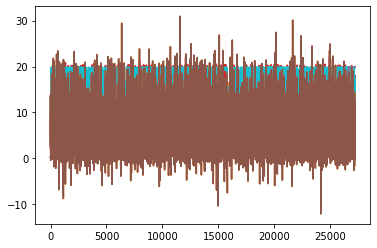

In [58]:
 for model in regressors[:8]:
    start = time()
    model.fit(X_train, y_train)
    train_time = time() - start
    start = time()
    y_pred = model.predict(X_test)
    predict_time = time()-start    
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tExplained variance:", explained_variance_score(y_test, y_pred))
    print("\tMean absolute error:", mean_absolute_error(y_test, y_pred))
    print("\tR2 score:", r2_score(y_test, y_pred))
    print()

In [59]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [100,200]
max_features = ['auto', 'sqrt']
max_depth = [10,20,None]
min_samples_split = [2, 5]
min_samples_leaf = [1, 2]
bootstrap = [True, False]
grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [60]:
model=RandomForestRegressor()
model_hyp= RandomizedSearchCV(estimator = model, param_distributions = grid, n_iter = 100, cv = 2, verbose=2, random_state=42, n_jobs = -1)

In [61]:
model_hyp.fit(X_train,y_train)

C:\Users\NITRO\Documents\project_1\env\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 96 is smaller than n_iter=100. Running 96 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 2 folds for each of 96 candidates, totalling 192 fits


RandomizedSearchCV(cv=2, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [100, 200]},
                   random_state=42, verbose=2)

In [62]:
model_hyp.score(X_test,y_test)

0.978363300042112

In [81]:
model_hyp.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': True}

On GridSearch score is almost same
### Now using MLP (multilayer perceptron)

In [63]:
from sklearn.neural_network import MLPRegressor

In [78]:
model6=MLPRegressor(max_iter=1000,warm_start=True,
    activation='tanh')
model6.fit(X_train,y_train)

MLPRegressor(activation='tanh', max_iter=1000, warm_start=True)

In [79]:
model6.score(X_test,y_test)

0.6267583289046025

In [66]:
from sklearn.model_selection import RandomizedSearchCV
hidden_layer=[(100,2),(50,2),(1000,2)]
activation=['logistic', 'relu']
solver=["sgd","tanh"]
momentum=[0.4,0.9]
grid = {'hidden_layer_sizes': hidden_layer,
               'activation': activation,
               'solver': solver,
               'momentum': momentum,
               }

In [67]:
model6_hyp= RandomizedSearchCV(estimator = model6, param_distributions = grid, n_iter = 100, cv = 2, verbose=2, random_state=42, n_jobs = -1)

In [68]:
model6_hyp.fit(X_train,y_train)

C:\Users\NITRO\Documents\project_1\env\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 24 is smaller than n_iter=100. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 2 folds for each of 24 candidates, totalling 48 fits


C:\Users\NITRO\Documents\project_1\env\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
24 fits failed out of a total of 48.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\NITRO\Documents\project_1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\NITRO\Documents\project_1\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 752, in fit
    return self._fit(X, y, incremental=False)
  File "C:\Users\NITRO\Documents\project_1\env\lib\site-packages\sklearn\neural_network\_multilayer_per

RandomizedSearchCV(cv=2,
                   estimator=MLPRegressor(activation='tanh',
                                          hidden_layer_sizes=(1000, 1)),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'activation': ['logistic', 'relu'],
                                        'hidden_layer_sizes': [(100, 2),
                                                               (50, 2),
                                                               (1000, 2)],
                                        'momentum': [0.4, 0.9],
                                        'solver': ['sgd', 'tanh']},
                   random_state=42, verbose=2)

In [69]:
model6_hyp.best_params_

{'solver': 'sgd',
 'momentum': 0.4,
 'hidden_layer_sizes': (50, 2),
 'activation': 'logistic'}

In [70]:
model6_hyp.score(X_test,y_test)

0.019568641757502836

## Without Albedo 

In [71]:
df2=df.drop("albedo",axis=1)

In [72]:
X2=df2.drop("diameter",axis=1)
y2=df2["diameter"]

In [73]:
X2_train,X2_test,y2_train,y2_test=train_test_split(X2,y2,test_size=0.2)

In [74]:
for model in regressors[:8]:
    start = time()
    model.fit(X2_train, y2_train)
    train_time = time() - start
    start = time()
    y2_pred = model.predict(X2_test)
    predict_time = time()-start    
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tExplained variance:", explained_variance_score(y2_test, y2_pred))
    print("\tMean absolute error:", mean_absolute_error(y2_test, y2_pred))
    print("\tR2 score:", r2_score(y2_test, y2_pred))
    print()

KNeighborsRegressor()
	Training time: 0.011s
	Prediction time: 48.983s
	Explained variance: 0.7875538606507116
	Mean absolute error: 1.0906525836256014
	R2 score: 0.7873808480605411

GradientBoostingRegressor()
	Training time: 47.867s
	Prediction time: 0.038s
	Explained variance: 0.8653008721986571
	Mean absolute error: 0.9104675044665744
	R2 score: 0.86529837330436

ExtraTreesRegressor()
	Training time: 37.205s
	Prediction time: 0.911s
	Explained variance: 0.8824770333387738
	Mean absolute error: 0.8058865748318073
	R2 score: 0.8824631406851239

RandomForestRegressor()
	Training time: 132.686s
	Prediction time: 0.833s
	Explained variance: 0.8840209388757433
	Mean absolute error: 0.7993243186265211
	R2 score: 0.8840148282132338

DecisionTreeRegressor()
	Training time: 2.215s
	Prediction time: 0.013s
	Explained variance: 0.7681617469600063
	Mean absolute error: 1.0688526135068577
	R2 score: 0.7681462290333669

LinearRegression()
	Training time: 0.046s
	Prediction time: 0.002s
	Explained